# EDA -2 (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adult_with_headers.csv')
df = data.copy()

In [3]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
print(df.shape)

(32561, 15)


In [5]:
 df.isnull().sum()
#there are no null values in this dataset

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

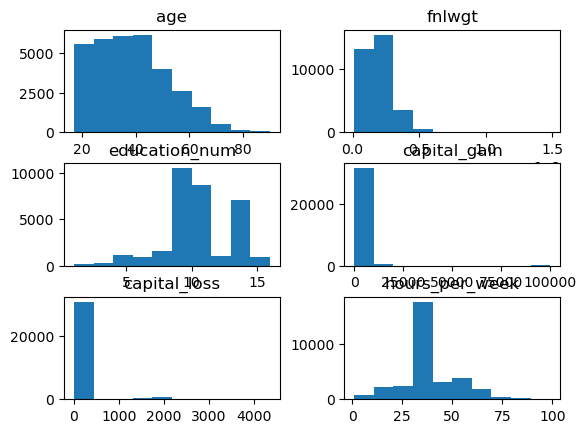

In [8]:
df.hist(grid=False)

<Axes: >

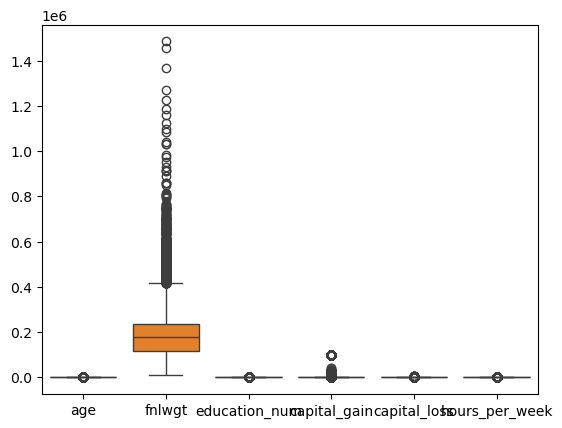

In [9]:
sns.boxplot(df)

<Axes: xlabel='fnlwgt', ylabel='Count'>

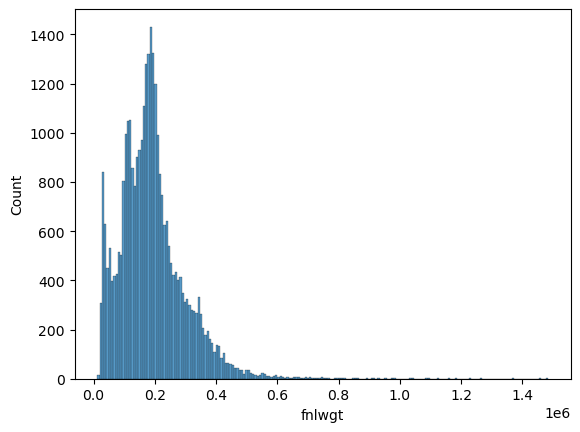

In [10]:
sns.histplot(df['fnlwgt'])

## Scaling

In [11]:
#scaling the numerical columns 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [12]:
non_obj_columns = df.columns[df.dtypes !='object']
non_obj_columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

Standar Scaling is the method of scaling based on the central tendancy / variance of the data

In [13]:
stdscaler = StandardScaler()
minmaxscaler = MinMaxScaler()

In [14]:
dfstd = stdscaler.fit_transform(df[non_obj_columns])
dfstd
dfstdscaler = pd.DataFrame(dfstd,columns=non_obj_columns)
dfstdscaler

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


Min Max Scaling is the method of scaling to the minimum and the maximum value of the data

In [16]:
dfminmaxscaler = minmaxscaler.fit_transform(df[non_obj_columns])
dfminmaxscaler = pd.DataFrame(dfminmaxscaler,columns=non_obj_columns)
dfminmaxscaler

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


<Axes: ylabel='Density'>

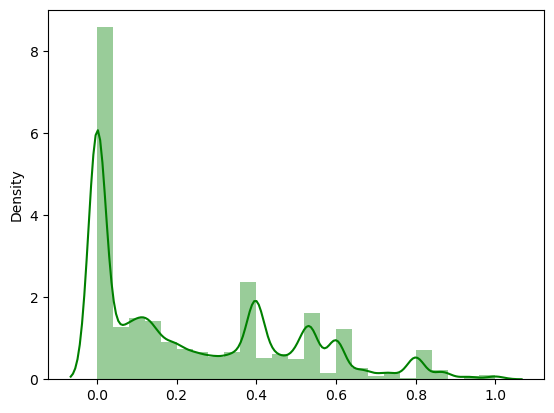

In [19]:
sns.distplot(dfminmaxscaler,bins=25,color='g') #after scaling the distribution of MinMaxScaler data

<Axes: ylabel='Density'>

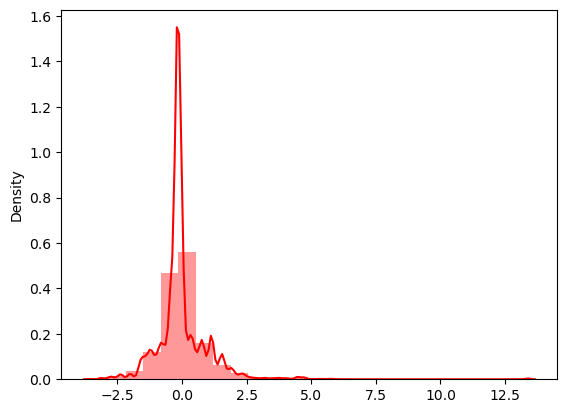

In [20]:
sns.distplot(dfstd,bins=25,color='r') #after scaling the distribution of Standard Sclaer data

## Encoding Techniques

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [22]:
#Encoding if the feature have less than 5 categories we go with OneHotEncoder/dummeies | or if the feature have more than 5 categories we go with LabelEncoder
EncodingforCategorical = df.columns[df.dtypes == 'object']
EncodingforCategorical

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [23]:
#now we will seggregate based on categories , if > 5 categories labelEncoding or <5 categories onehotencoding
print('education',np.unique(df['education']))
print()
print('workclass',np.unique(df['workclass']))
print()
print('maritial_status',np.unique(df['marital_status']))
print()
print('occupation',np.unique(df['occupation']))
print()
print('relationship',np.unique(df['relationship']))
print()
print('race',np.unique(df['race']))
print()
print('sex',np.unique(df['sex']))
print()
print('native_country',np.unique(df['native_country']))
print()
print('income',np.unique(df['income']))
print()

education [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']

workclass [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']

maritial_status [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']

occupation [' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']

relationship [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']

race [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']

sex [' Female' ' Male']

native_country [' ?' ' Cambodia' ' Canada' ' China' ' 

In [24]:
#from the above we got less than 5 categories only 2 those are df['sex','income'] required Onehotencoding
#remaing columns df[['education','workclass','marital_status','occupation','relationship','race','native_country']] needed LabelEncoding

In [25]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labelenc = LabelEncoder()
onehotenc = OneHotEncoder()

In [26]:
df['education'] = labelenc.fit_transform(df['education'])
df['workclass']= labelenc.fit_transform(df['workclass'])
df['marital_status']= labelenc.fit_transform(df['marital_status'])
df['occupation']= labelenc.fit_transform(df['occupation'])
df['relationship']= labelenc.fit_transform(df['relationship'])
df['race']= labelenc.fit_transform(df['race']) 
df['native_country']= labelenc.fit_transform(df['native_country'])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,Female,0,0,38,39,<=50K
32557,40,4,154374,11,9,2,7,0,4,Male,0,0,40,39,>50K
32558,58,4,151910,11,9,6,1,4,4,Female,0,0,40,39,<=50K
32559,22,4,201490,11,9,4,1,3,4,Male,0,0,20,39,<=50K


In [27]:
dummies = pd.get_dummies(df[['sex','income']],dtype=int)

In [28]:
dummies

,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,1,0,1,0
...,...,...,...,...
32556,1,0,1,0
32557,0,1,0,1
32558,1,0,1,0
32559,0,1,1,0


In [29]:
df.drop(df[['sex','income']],axis=1,inplace=True)

In [30]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39


In [31]:
df=df.join(dummies,how='right')

In [32]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int32
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  int32
 4   education_num   32537 non-null  int64
 5   marital_status  32537 non-null  int32
 6   occupation      32537 non-null  int32
 7   relationship    32537 non-null  int32
 8   race            32537 non-null  int32
 9   capital_gain    32537 non-null  int64
 10  capital_loss    32537 non-null  int64
 11  hours_per_week  32537 non-null  int64
 12  native_country  32537 non-null  int32
 13  sex_ Female     32537 non-null  int32
 14  sex_ Male       32537 non-null  int32
 15  income_ <=50K   32537 non-null  int32
 16  income_ >50K    32537 non-null  int32
dtypes: int32(11), int64(6)
memory usage: 4.1 MB


In [34]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
count,32537.000000,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,3.868734,1.897808e+05,10.297507,10.081815,2.611427,6.572856,1.446538,3.665827,1078.443741,87.368227,40.440329,36.721579,0.330762,0.669238,0.759074,0.240926
std,13.637984,1.456445,1.055565e+05,3.870142,2.571633,1.506301,4.229521,1.607064,0.848847,7387.957424,403.101833,12.346889,7.820732,0.470495,0.470495,0.427652,0.427652
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000,1.000000,1.000000,0.000000
75%,48.000000,4.000000,2.369930e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,0.000000,0.000000,45.000000,39.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
corr = df.corr()
corr=corr.round(2)

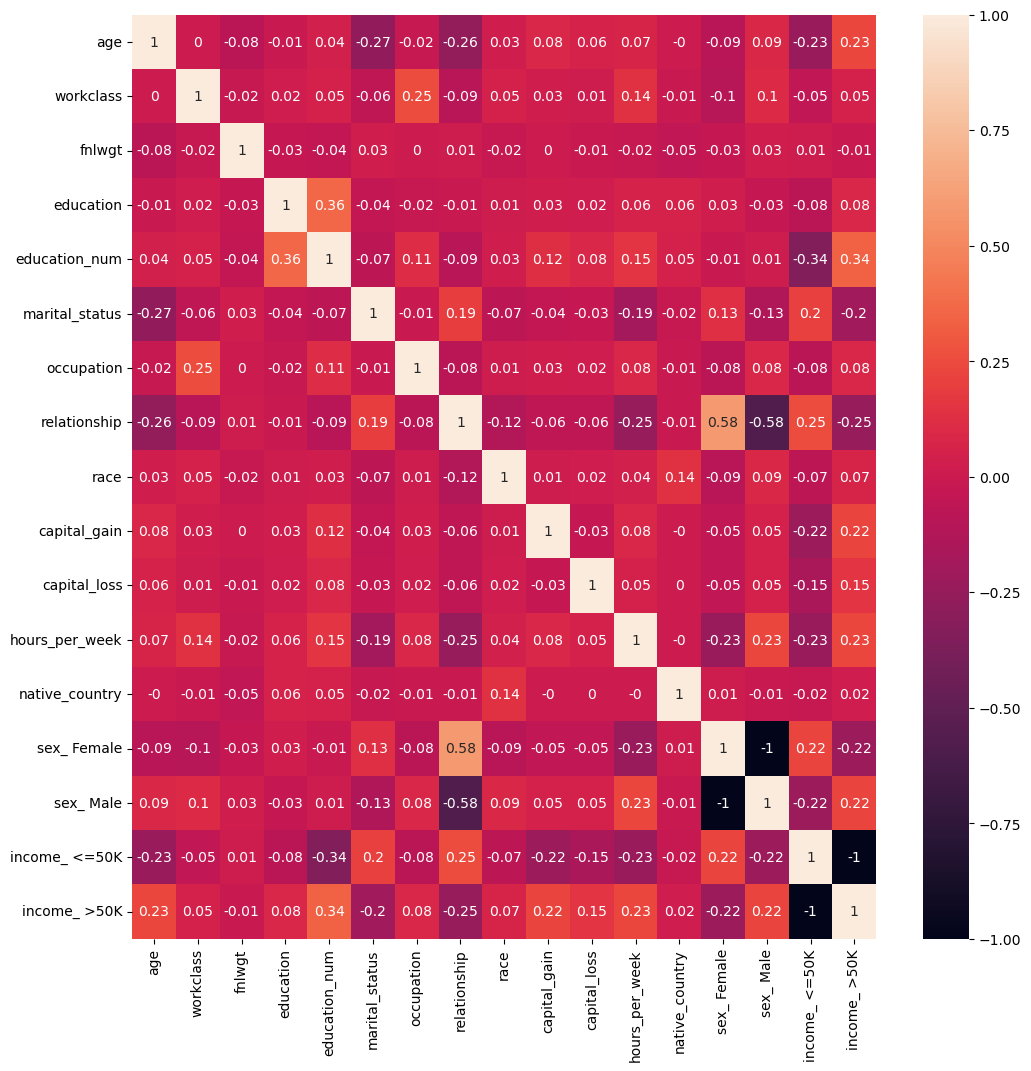

In [36]:
plot = plt.figure(figsize=(12,12))
plot = sns.heatmap(corr,annot=True)


In [37]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'marital_status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'capital_gain'}>,
        <Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>],
       [<Axes: title={'center': 'native_country'}>,
        <Axes: title={'center': 'sex_ Female'}>,
        <Axes: title={'center': 'sex_ Male'}>,
        <Axes: title={'center': 'income_ <=50K'}>],
       [<Axes: title={'center': 'income_ >50K'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

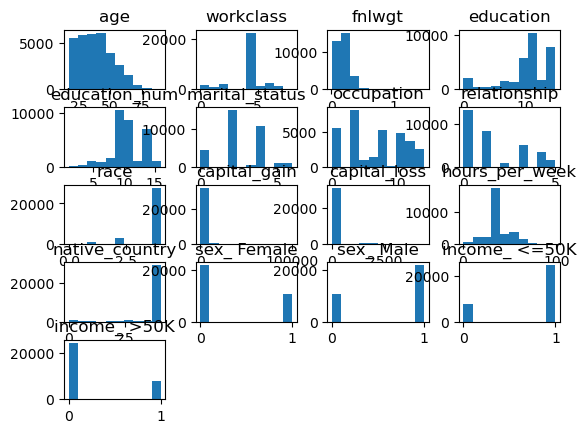

In [38]:
df.hist(grid=False)